In [1]:
import utils
from matplotlib import pyplot as plt
import re
import numpy as np

ModuleNotFoundError: No module named 'pyparsing'

In [ ]:
disease='SystemicSclerosis'
symp_type='informal'
#keywords=['jdm', 'dermatomyositis']
#keywords = ['mctd', 'mixed connective tissue disease']
keywords=['sclerosis','scleroderma','systemic sclerosis']
models=['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus']# 'claude-3.5-sonnet']
baseline_model_id=0

In [ ]:
all_patients_list = [ utils.process_file(f'{disease}-{symp_type}-{mdl}.txt') for mdl in models]
len(all_patients_list)

In [43]:
n_patients = len(all_patients_list[1])

In [44]:
len(all_patients_list)

3

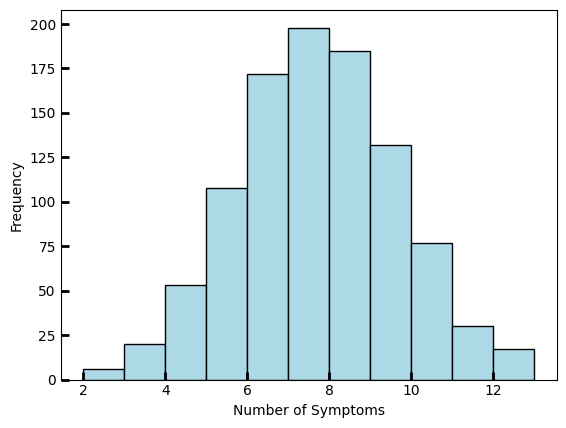

In [45]:
symptom_list_sizes = [len(pt.symptom_list) for pt in all_patients_list[1]]
fig = plt.figure(frameon=False)
plt.hist(symptom_list_sizes, bins=11, edgecolor='black', color='lightblue')
ax = fig.axes[0]
ax.tick_params(direction='in', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5)
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.savefig(f'{disease}-{symp_type}-Symptom-List-Sizes.png', bbox_inches='tight')
plt.show()

In [46]:
def get_list_with_frequency_sorted(all_symptoms_raw, max_symptoms=15, plot_title='Title', filename='plot.png'):
    all_symptoms = []
    for s in all_symptoms_raw:
        m = re.match('\s*(.*)\(.*\)\s*', s)
        if m:
            all_symptoms.append(m.group(1).strip())
        else:
            all_symptoms.append(s)
    uniq_symptoms=set(all_symptoms)
    res = []
    for s in uniq_symptoms:
        j = all_symptoms.count(s)
        res.append((j, s))
    res_merged = []
    n = len(res)
    for i in range(n):
        (f1, s) = res[i]
    res.sort(reverse=True)
    if max_symptoms > 0 and len(res) > max_symptoms:
        res = res[0:max_symptoms]
    labels = [t[1] for t in res]
    freq = [t[0] for t in res]
    plt.figure(figsize=(20, 20))  # width:20, height:20
    fig, ax = plt.subplots()
    y_pos = np.arange(len(labels))
    
    ax.barh(y_pos, freq, edgecolor='black', color='lightblue', align='center')
    ax.set_yticks(y_pos, labels=labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='r', grid_alpha=0.5)
    ax.set_xlabel('Frequency ')
    plt.title(plot_title)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    return res

In [47]:
def generate_plot_of_symptom_frequencies(model_id, all_patients_list):
    top_symptoms = [pt.get_top_symptom().lower() for pt in all_patients_list[model_id]]
    top_three_symptoms = [ s.lower() for pt in all_patients_list[model_id] for s in pt.get_top_three_symptoms() ]
    model_name = models[model_id]
    plot_1_title=f'Top Diagnosis ({disease}, {symp_type}, {model_name})'
    plot_1_filename=f'{disease}-{symp_type}-top-{model_name}.png'
    get_list_with_frequency_sorted(top_symptoms,  plot_title=plot_1_title, filename=plot_1_filename)
    plot_2_title=f'Top Three Diagnosis ({disease}, {symp_type}, {model_name})'
    plot_2_filename=f'{disease}-{symp_type}-top-three-{model_name}.png'
    get_list_with_frequency_sorted(top_three_symptoms,  plot_title=plot_2_title, filename=plot_2_filename)
    

    

<Figure size 2000x2000 with 0 Axes>

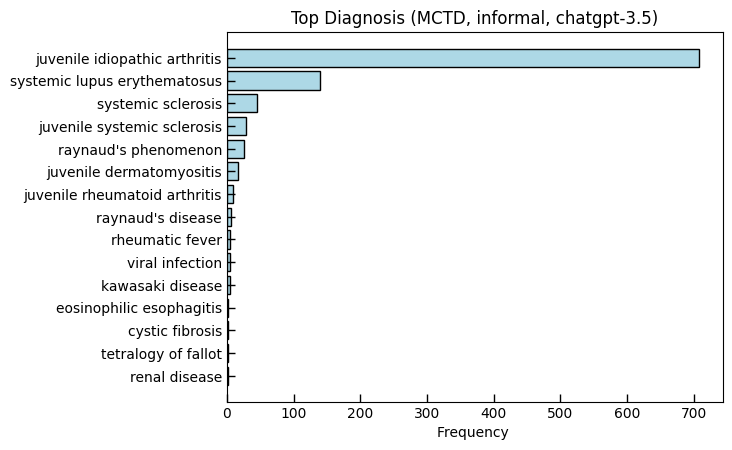

<Figure size 2000x2000 with 0 Axes>

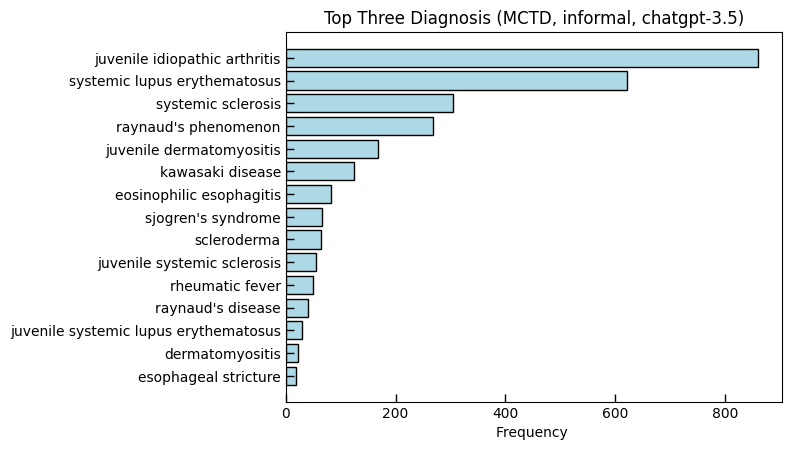

In [48]:
generate_plot_of_symptom_frequencies(0, all_patients_list)

<Figure size 2000x2000 with 0 Axes>

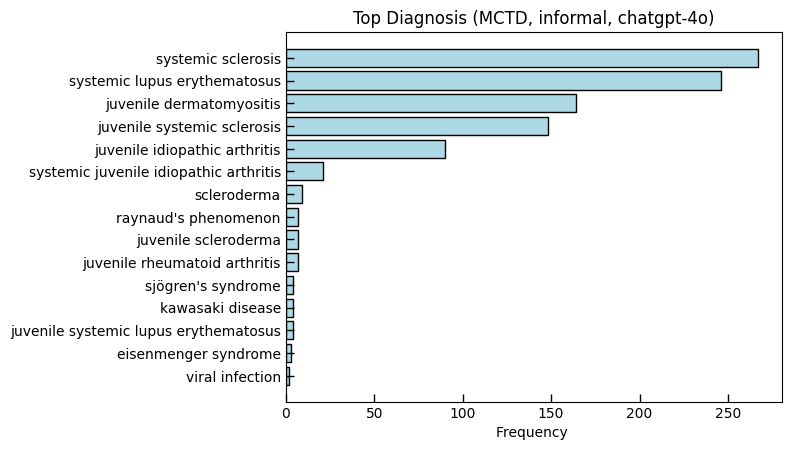

<Figure size 2000x2000 with 0 Axes>

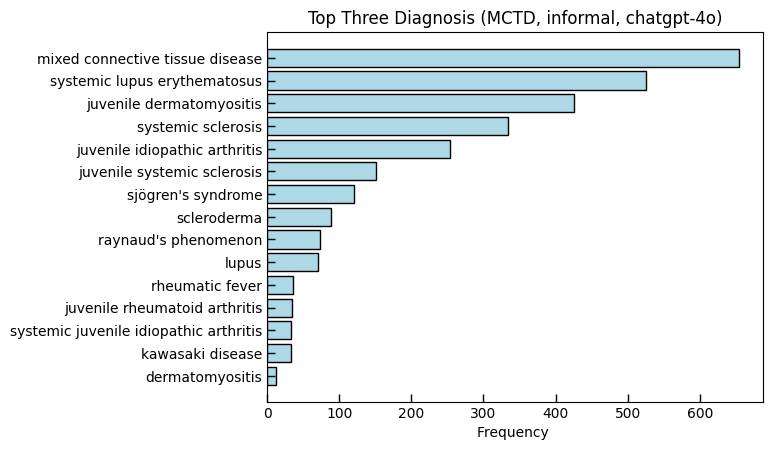

In [49]:
generate_plot_of_symptom_frequencies(1, all_patients_list)

<Figure size 2000x2000 with 0 Axes>

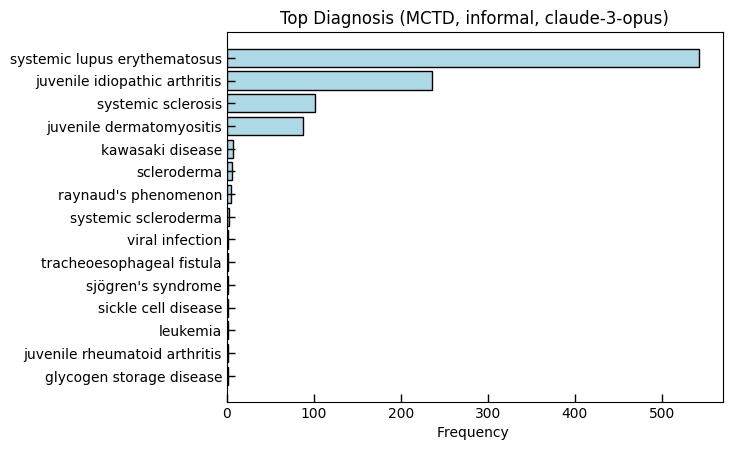

<Figure size 2000x2000 with 0 Axes>

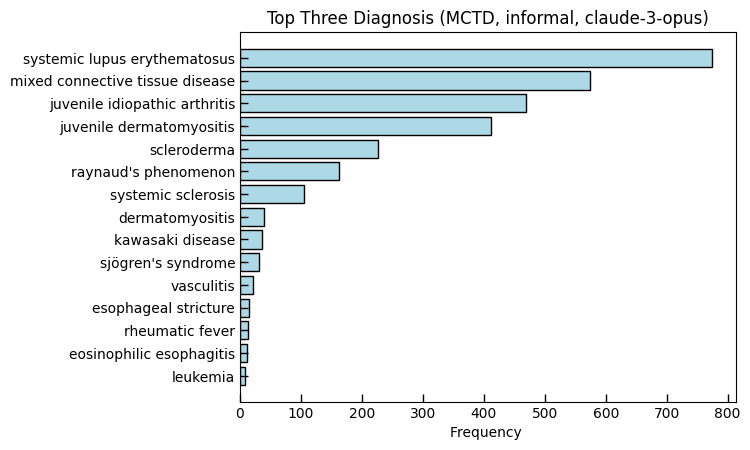

In [50]:
generate_plot_of_symptom_frequencies(2, all_patients_list)

<Figure size 2000x2000 with 0 Axes>

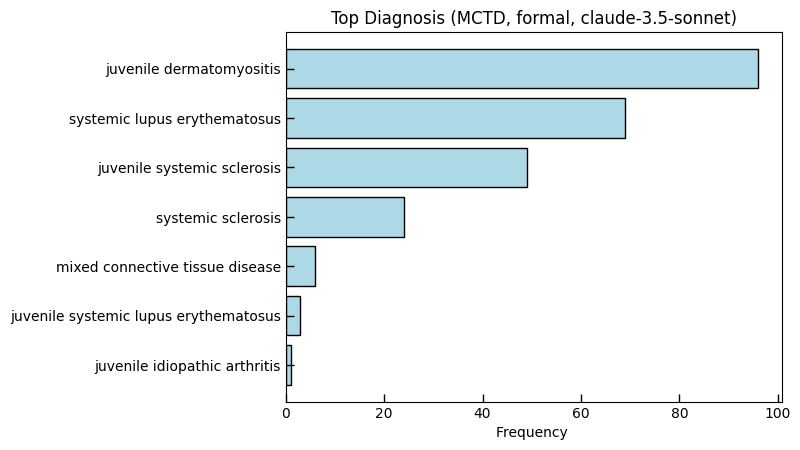

<Figure size 2000x2000 with 0 Axes>

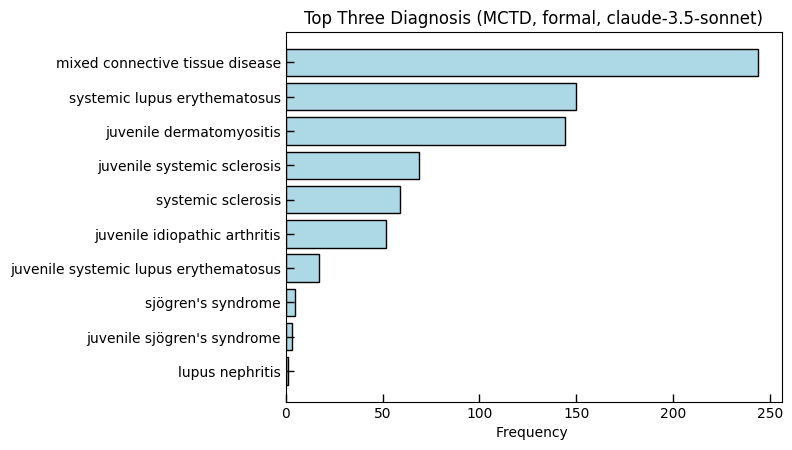

In [18]:
generate_plot_of_symptom_frequencies(3, all_patients_list)

In [51]:
def get_incorrect_patient_ids(model_id, all_patients_list):
    all_patients = all_patients_list[model_id]
    not_in_top_3 = utils.select_where_x_is_not_top(all_patients, keywords)
    return set(p.n for p in not_in_top_3)

In [52]:
incorrect_patient_id_list = [get_incorrect_patient_ids(i, all_patients_list) for i in range(len(models))]

In [53]:
def print_frequency_table(incorrect_patient_id_list):
    print(f'Name \t\t # {disease} in top3')
    print('----------\t\t --------')
    for i in range(len(models)):
        model_name = models[i]
        incorrect_pt_ids = incorrect_patient_id_list[i]
        print(f'{model_name} \t\t {n_patients - len(incorrect_pt_ids)}')
    print('-----------\t\t ---------')

In [54]:
print_frequency_table(incorrect_patient_id_list)

Name 		 # MCTD in top3
----------		 --------
chatgpt-3.5 		 11
chatgpt-4o 		 655
claude-3-opus 		 573
-----------		 ---------


In [55]:
def compare_sets(set_a, set_b):
    return  len(set_b.difference(set_a)), len(set_a.difference(set_b))

In [56]:
import pandas as pd
def print_comparison_matrix(incorrect_patient_id_list):
    all_comps = []
    for i in range(len(models)):
        tups = [compare_sets(incorrect_patient_id_list[j], incorrect_patient_id_list[i]) for j in range(len(models))]
        tup_str_list = [ f'+{a}, -{b}' for (a,b) in tups]
        all_comps.append(tup_str_list)
    return pd.DataFrame(all_comps, columns=models, index=models)

        
print_comparison_matrix(incorrect_patient_id_list)   
        

,chatgpt-3.5,chatgpt-4o,claude-3-opus
chatgpt-3.5,"+0, -0","+647, -3","+562, -0"
chatgpt-4o,"+3, -647","+0, -0","+121, -203"
claude-3-opus,"+0, -562","+203, -121","+0, -0"
